In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1. Linear Classification

In [3]:
data_raw = load_breast_cancer()

In [4]:
data_raw.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
data_raw.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
X = data_raw.data
y = data_raw.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [8]:
rows, cols = X_train.shape

In [9]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
model = tf.keras.models.Sequential([
    # tf.keras.layers.Input(shape=(cols,)),
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(cols,))
])

In [11]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [13]:
fit_object = model.fit(
    x=X_train, y=y_train,
    validation_data=(X_test, y_test),
    epochs=20
)

Epoch 1/20
13/13 [==============================] - 1s 36ms/step - loss: 1.8815 - accuracy: 0.0852 - val_loss: 1.7283 - val_accuracy: 0.1111
Epoch 2/20
13/13 [==============================] - 0s 5ms/step - loss: 1.6974 - accuracy: 0.1146 - val_loss: 1.5947 - val_accuracy: 0.1287
Epoch 3/20
13/13 [==============================] - 0s 5ms/step - loss: 1.5679 - accuracy: 0.1147 - val_loss: 1.4680 - val_accuracy: 0.1637
Epoch 4/20
13/13 [==============================] - 0s 5ms/step - loss: 1.4557 - accuracy: 0.1925 - val_loss: 1.3493 - val_accuracy: 0.2164
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 1.3078 - accuracy: 0.2527 - val_loss: 1.2396 - val_accuracy: 0.2632
Epoch 6/20
13/13 [==============================] - 0s 5ms/step - loss: 1.2310 - accuracy: 0.2819 - val_loss: 1.1376 - val_accuracy: 0.2924
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 1.1178 - accuracy: 0.3380 - val_loss: 1.0462 - val_accuracy: 0.4152
Epoch 8/20
13/13 [=

In [14]:
print("Train score: ", model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.7915
Train score:  [0.4816097021102905, 0.7914572954177856]
6/6 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8596
Test score:  [0.4724648892879486, 0.859649121761322]


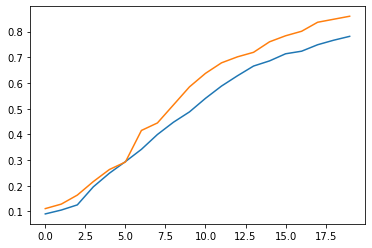

In [15]:
plt.plot(fit_object.history['accuracy'], label='Train Acuracy')
plt.plot(fit_object.history['val_accuracy'], label='Test Acuracy')

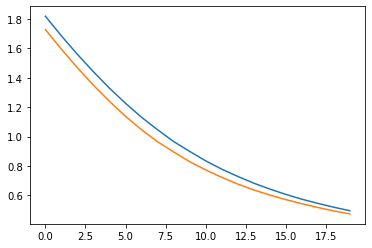

In [16]:
plt.plot(fit_object.history['loss'], label='Train Loss')
plt.plot(fit_object.history['val_loss'], label='Test Loss')

In [17]:
P = model.predict(X_test)
P = np.round(P).flatten()
print(P)

[0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 1.]


In [18]:
print("Manually calculated accuracy:", np.mean(P == y_test))

print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.8596491228070176
6/6 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.8596
Evaluate output: [0.4724648892879486, 0.859649121761322]


In [19]:
model.save('linear_classificator.h5')

## 2. Linear regression



In [20]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-03-08 13:18:51--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.4’

moore.csv.4         100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-03-08 13:18:51 (24.2 MB/s) - ‘moore.csv.4’ saved [2302/2302]



In [21]:
data = pd.read_csv('moore.csv', names=['year','transistors'])
data.head()

,year,transistors
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [22]:
X = data.iloc[:,0].values
Y = data.iloc[:,1].values

In [23]:
X = X.reshape(-1, 1)

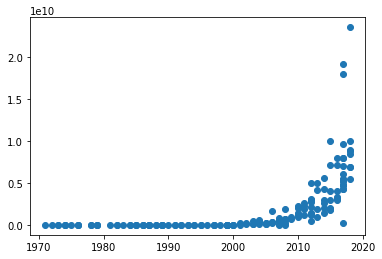

In [24]:
plt.scatter(X, Y)

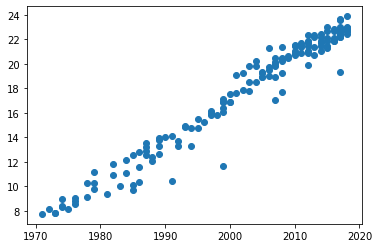

In [25]:
plt.scatter(X, np.log(Y))

In [26]:
# Centering X around its mean to have smaller values
X = X - X.mean()

# Taking the log of Y to convert into a linear problem
Y = np.log(Y)

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation=None, input_shape=(1,))
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss=tf.keras.losses.mean_squared_error
)

In [30]:
# Schedule learning rate
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [31]:
fit_object = model.fit(
    X, Y,
    epochs=100,
    callbacks=[scheduler]
)

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 364.5432
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 382.7134
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 517.9850
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 309.9052
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 256.1434
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 341.1373
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 270.2594
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 151.1541
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 63.5181
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 40.6545
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 24.5801
Epoch 12/100
6/6 [==============================] - 0s 1ms/step - loss: 28.2684
Epoch 13/100
6/6 [=======================

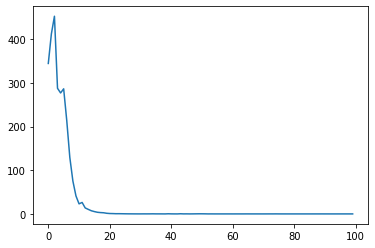

In [32]:
plt.plot(fit_object.history['loss'], label='Loss')

In [33]:
# Get the weights
model.layers[0].get_weights()

[array([[0.33585006]], dtype=float32), array([17.76636], dtype=float32)]

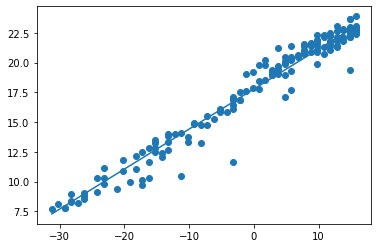

In [34]:
y_hat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, y_hat)

In [35]:
# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X, because it aws flattened before
X = X.reshape(-1 ,1)

# (N x 1) x (1 x 1) + (1) = (N x 1)
y_hat2 = (X.dot(w) + b).flatten()

# Verify that y_hat and y_hat2 are close
np.allclose(y_hat, y_hat2)

True

In [36]:
model.save('linear_regressor.h5')